In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import datetime

In [2]:
columns = ['id','dt','products','amount']
df = pd.read_csv(r'D:\研究生资料\莫烦python学习\数据分析CD网站用户消费行为分析\CDNOW_master.txt',names = columns,sep = '\s+')#sep表示匹配分隔符，\s+表示一个或多个空白字符（这这里指空格）

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        69659 non-null  int64  
 1   dt        69659 non-null  int64  
 2   products  69659 non-null  int64  
 3   amount    69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


id:用户ID
dt:购买日期
products：购买产品数
amount：购买金额

In [4]:
df.head(3)

,id,dt,products,amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00


In [5]:
df.describe()

,id,dt,products,amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


- 大部分订单只消费了少量商品（平均2.4个），有一定极值干扰
- 用户的消费金额比较稳定，平均消费35元，中位数25元，有一定极值干扰

In [6]:
df['dt'] = pd.to_datetime(df.dt,format = '%Y%m%d') # 转变为时间格式
df.head(3)

,id,dt,products,amount
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        69659 non-null  int64         
 1   dt        69659 non-null  datetime64[ns]
 2   products  69659 non-null  int64         
 3   amount    69659 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.1 MB


In [8]:
df.dt.max()

Timestamp('1998-06-30 00:00:00')

In [9]:
df.dt.min()

Timestamp('1997-01-01 00:00:00')

In [11]:
df['month'] = df.dt.values.astype('datetime64[M]') #月份信息
df.head(5)

,id,dt,products,amount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


In [12]:
df.month.max()

Timestamp('1998-06-01 00:00:00')

In [13]:
df.month.min()

Timestamp('1997-01-01 00:00:00')

## 进行用户消费趋势分析（月）
1. 每月的消费总金额
2. 每月的消费次数
3. 每月的产品购买量
4. 每月的消费人数

### 方法一

In [14]:
grouped_month=df.groupby('month')
amount_sum_month = grouped_month.amount.sum()
amount_sum_month

month
1997-01-01    299060.17
1997-02-01    379590.03
1997-03-01    393155.27
1997-04-01    142824.49
1997-05-01    107933.30
1997-06-01    108395.87
1997-07-01    122078.88
1997-08-01     88367.69
1997-09-01     81948.80
1997-10-01     89780.77
1997-11-01    115448.64
1997-12-01     95577.35
1998-01-01     76756.78
1998-02-01     77096.96
1998-03-01    108970.15
1998-04-01     66231.52
1998-05-01     70989.66
1998-06-01     76109.30
Name: amount, dtype: float64

In [15]:
import matplotlib.pyplot as plt 
%matplotlib inline
#是用于在jupyter下将那些用matplotlib绘制的图显示在页面里而不是弹出一个窗口
plt.style.use('ggplot')

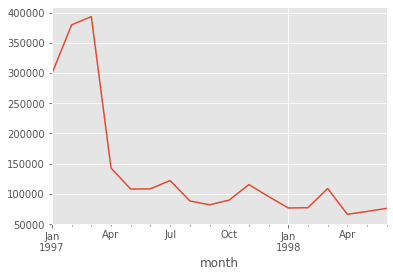

In [16]:
# 每月的消费总金额(折线图)
amount_sum_month.plot()

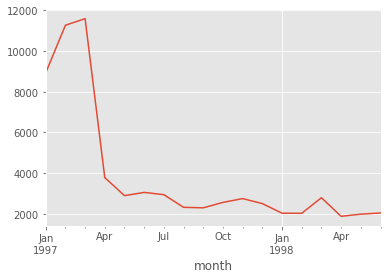

In [18]:
# 每月的消费次数(每月的订单数)
# grouped_month.id.count()
grouped_month.id.count().plot()

前几个月销量非常高，相比于后期数据显得异常，后期则较为平稳

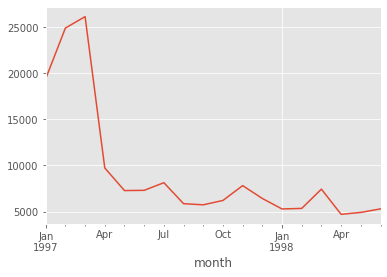

In [19]:
# 每月的产品购买量
grouped_month.products.sum().plot()

In [22]:
# 每月的消费人数
df.groupby('month').id.apply(lambda x:len(x.drop_duplicates()))
# 等价于


month
1997-01-01    7846
1997-02-01    9633
1997-03-01    9524
1997-04-01    2822
1997-05-01    2214
1997-06-01    2339
1997-07-01    2180
1997-08-01    1772
1997-09-01    1739
1997-10-01    1839
1997-11-01    2028
1997-12-01    1864
1998-01-01    1537
1998-02-01    1551
1998-03-01    2060
1998-04-01    1437
1998-05-01    1488
1998-06-01    1506
Name: id, dtype: int64

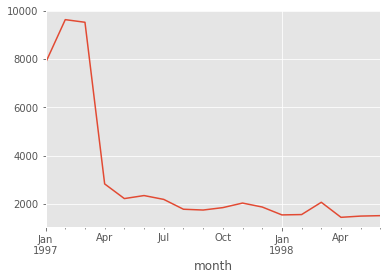

In [23]:
df.groupby('month').id.apply(lambda x:len(x.drop_duplicates())).plot()

1. 每月消费人数低于每月消费次数，但差异不大
2. 前三个月每月的消费人数在8000~10000之间，后续月份平均消费人数在2000人不到

### 方法二

In [25]:
df.pivot_table(
    index='month',
    values=['products','amount','id'],
    aggfunc={
        'products':'sum',
        'amount':'sum',
        'id':'count'
    }
)

,amount,id,products
month,,,
1997-01-01,299060.17,8928,19416
1997-02-01,379590.03,11272,24921
1997-03-01,393155.27,11598,26159
1997-04-01,142824.49,3781,9729
1997-05-01,107933.30,2895,7275
1997-06-01,108395.87,3054,7301
1997-07-01,122078.88,2942,8131
1997-08-01,88367.69,2320,5851
1997-09-01,81948.80,2296,5729


1. 'amount':表示每月的消费总金额
2. 'id': 表示每月的消费次数（或月订单数）
3. 'products': 每月的产品购买量

In [40]:
df.groupby(['month','id']).count().reset_index()

,month,id,dt,products,amount
0,1997-01-01,1,1,1,1
1,1997-01-01,2,2,2,2
2,1997-01-01,3,1,1,1
3,1997-01-01,4,2,2,2
4,1997-01-01,5,2,2,2
...,...,...,...,...,...
55374,1998-06-01,23444,1,1,1
55375,1998-06-01,23489,1,1,1
55376,1998-06-01,23513,1,1,1
55377,1998-06-01,23555,1,1,1


In [46]:
df2=df.groupby(['month','id']).count().reset_index()
a = list(df2['month'].unique())
for i in range(len(a)):
    print(a[i])
    print(len(df2.loc[df2['month']==a[i]]))

1997-01-01T00:00:00.000000000
7846
1997-02-01T00:00:00.000000000
9633
1997-03-01T00:00:00.000000000
9524
1997-04-01T00:00:00.000000000
2822
1997-05-01T00:00:00.000000000
2214
1997-06-01T00:00:00.000000000
2339
1997-07-01T00:00:00.000000000
2180
1997-08-01T00:00:00.000000000
1772
1997-09-01T00:00:00.000000000
1739
1997-10-01T00:00:00.000000000
1839
1997-11-01T00:00:00.000000000
2028
1997-12-01T00:00:00.000000000
1864
1998-01-01T00:00:00.000000000
1537
1998-02-01T00:00:00.000000000
1551
1998-03-01T00:00:00.000000000
2060
1998-04-01T00:00:00.000000000
1437
1998-05-01T00:00:00.000000000
1488
1998-06-01T00:00:00.000000000
1506


## 用户个体消费分析
1. 用户消费金额、消费次数的描述统计
2. 用户消费金额和消费的散点图
3. 用户消费金额的分布图
4. 用户消费次数的分布图
5. 用户累计消费金额占比（百分之多少的用户占了百分之多少的消费额）


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        69659 non-null  int64         
 1   dt        69659 non-null  datetime64[ns]
 2   products  69659 non-null  int64         
 3   amount    69659 non-null  float64       
 4   month     69659 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 2.7 MB


In [48]:
df.head()

,id,dt,products,amount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


In [49]:
len(list(df['id'].unique()))

23570

总共有23570个不同的用户

In [50]:
grouped_user=df.groupby('id')
grouped_user.sum()

,products,amount
id,,
1,1,11.77
2,6,89.00
3,16,156.46
4,7,100.50
5,29,385.61
...,...,...
23566,2,36.00
23567,1,20.97
23568,6,121.70


### 1. 用户消费金额、消费次数的描述统计

In [51]:
grouped_user.sum().describe()

,products,amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


1.	用户平均购买了7张CD，但中位值只有3，说明小部分用户购买了大量的CD
2.	用户平均消费106元，中位值有43，判断同上，有极值干扰

### 2. 用户消费金额和消费的散点图

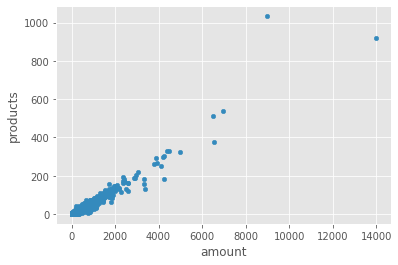

In [54]:
grouped_user.sum().plot.scatter(x='amount',y='products')

1. 散点图对数据异常值比较敏感，
2. 通过散点图对异常值数据进行一定的过滤

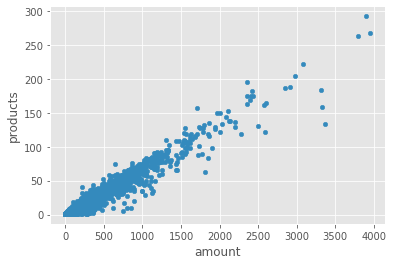

In [57]:
grouped_user.sum().query('amount<4000').plot.scatter(x='amount',y='products')

### 3. 用户消费金额的分布图

In [59]:
grouped_user.sum().amount

id
1         11.77
2         89.00
3        156.46
4        100.50
5        385.61
          ...  
23566     36.00
23567     20.97
23568    121.70
23569     25.74
23570     94.08
Name: amount, Length: 23570, dtype: float64

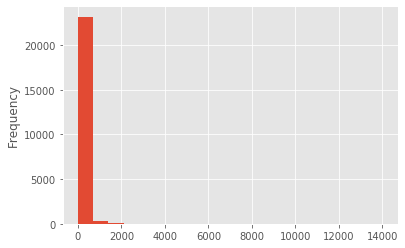

In [60]:
grouped_user.sum().amount.plot.hist(bins=20)

1. 在0至14000间划分20,将amount的数值分为20个bin,第一个bin的范围是0~700。
2. 从直方图可知，用户消费金额，绝大部分呈现集中趋势，小部分异常值干扰了判断。可以使用过渡操作排除异常。

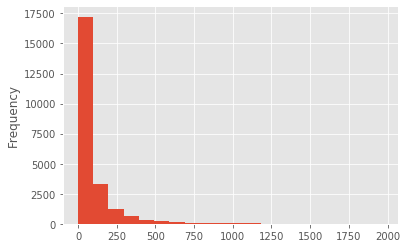

In [64]:
grouped_user.sum().query('amount<2000').amount.plot.hist(bins=20)

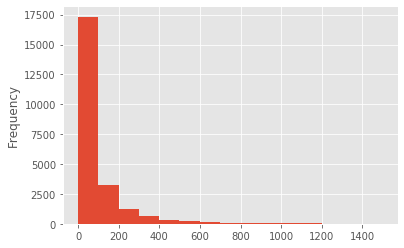

In [65]:
grouped_user.sum().query('amount<1500').amount.plot.hist(bins=15)

绝大部分用户的消费金额在0至200之间

### 4. 用户购买量的分布图

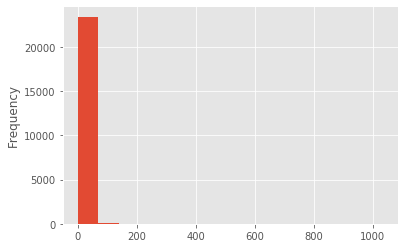

In [67]:
grouped_user.sum().query('products<1500').products.plot.hist(bins=15)

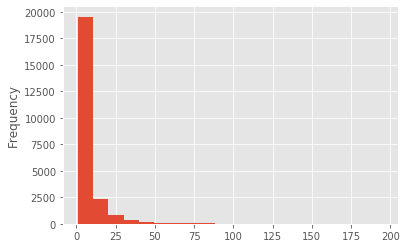

In [68]:
grouped_user.sum().query('products<200').products.plot.hist(bins=20)

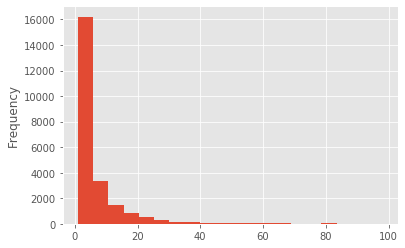

In [69]:
grouped_user.sum().query('products<100').products.plot.hist(bins=20)

In [70]:
grouped_user.sum().products.value_counts()

1      6809
2      3933
3      2425
4      1731
5      1314
       ... 
116       1
84        1
330       1
222       1
159       1
Name: products, Length: 154, dtype: int64

In [71]:
grouped_user.sum().products.value_counts().head(50)

1     6809
2     3933
3     2425
4     1731
5     1314
6      973
7      761
8      655
9      510
10     432
12     376
11     354
13     297
14     252
15     225
16     201
17     182
20     156
18     151
19     136
22     117
21     100
23      99
24      96
25      84
26      82
27      80
28      67
30      57
35      51
32      48
29      48
31      46
33      36
36      32
38      32
37      32
34      31
46      25
40      22
49      21
41      21
39      20
43      19
44      18
42      17
52      16
47      15
55      15
53      14
Name: products, dtype: int64

绝大多数的用户购买量在0到10之间

### 5.用户累计消费金额占比（百分之多少的用户占了百分之多少的消费额）

In [79]:
grouped_user.sum().sort_values('amount').cumsum()

,products,amount
id,,
10175,1,0.00
4559,2,0.00
1948,3,0.00
925,4,0.00
10798,5,0.00
...,...,...
7931,165017,2463822.60
19339,165395,2470375.30
7983,165931,2477348.37


In [83]:
user_cumsum=grouped_user.sum().sort_values('amount').apply(lambda x:x.cumsum()/x.sum())
user_cumsum.reset_index()

,id,products,amount
0,10175,0.000006,0.000000
1,4559,0.000012,0.000000
2,1948,0.000018,0.000000
3,925,0.000024,0.000000
4,10798,0.000030,0.000000
...,...,...,...
23565,7931,0.982940,0.985405
23566,19339,0.985192,0.988025
23567,7983,0.988385,0.990814
23568,14048,0.994538,0.994404


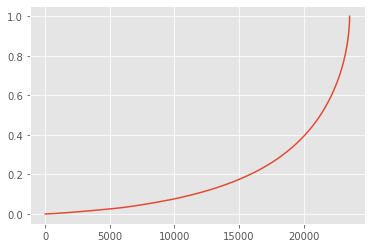

In [84]:
user_cumsum.reset_index().amount.plot()

1. 按用户消费金额进行升序，由图可知50%的用户仅贡献了15%的消费额度，而排名前5000的用户就贡献了60%的消费额
2. 是否满足‘二八原则’

## 用户消费行为
1. 用户第一次消费（首购）
2. 用户最后一次消费
3. 新老客消费比
    3.1 多少用户仅消费了一次？
    3.2 复购率与回购率
4. 用户分层
    4.1 RFM
    4.2 新、老、活跃、回流、流失
5. 用户购买周期（按订单）
    5.1 用户消费周期描述
    5.2 用户消费周期分布
6. 用户生命周期（按第一次&最后一次消费）
    6.1 用户生命周期描述
    6.2 用户生命周期分布

1. 复购率定义：在某时间窗口内重复消费用户（消费两次及以上的用户）在总消费用户中占比。
2. 回购率定义：是某一个时间窗口内消费的用户，在下一个时间窗口仍旧消费的占比。
3. 区别：复购率是一个时间窗口的多次消费行为，回购率是两个时间窗口内的消费行为。复购率与回购率越高，反应消费者对品牌的忠诚度就越高，反之则越低。

### 1. 用户第一次购买的时间（月份）

In [89]:
# 1. 用户第一次购买的时间（月份）
grouped_user=df.groupby('id')
grouped_user.min().month

id
1       1997-01-01
2       1997-01-01
3       1997-01-01
4       1997-01-01
5       1997-01-01
           ...    
23566   1997-03-01
23567   1997-03-01
23568   1997-03-01
23569   1997-03-01
23570   1997-03-01
Name: month, Length: 23570, dtype: datetime64[ns]

In [90]:
grouped_user.min().month.value_counts()

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

用户消费行为中第一次的消费时间，集中在前三个月

### 2. 用户最后一次消费

In [91]:
# 2. 用户最后一次消费
df.groupby('id').month.max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

1. 大部分用户最后一次消费时间集中在前三个月，说明很多用户购买了一次后就不再进行购买了。
2. 后续的时间段内，依然有用户在消费，但是缓慢减少。

### 3.1 多少用户仅消费了一次？

In [92]:
# 3. 新老客消费比
# 3.1 多少用户仅消费了一次？
# 3.2 每月新客占比？
user_life = df.groupby('id').dt.agg(['min','max'])
user_life.head()

,min,max
id,,
1,1997-01-01,1997-01-01
2,1997-01-12,1997-01-12
3,1997-01-02,1998-05-28
4,1997-01-01,1997-12-12
5,1997-01-01,1998-01-03


In [93]:
(user_life['min']==user_life['max']).value_counts()

True     12054
False    11516
dtype: int64

1. 从这可以看出新客数量、与老客数量
2. 有一半用户只消费了一次

### 3.2 复购率

In [94]:
#复购率
pi_counts = df.pivot_table(index = 'id',columns = 'month',
                           values = 'dt',aggfunc = 'count').fillna(0)
pi_counts

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23568,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
df.month.sort_values().astype('str').unique()

array(['1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
       '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
       '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
       '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
       '1998-05-01', '1998-06-01'], dtype=object)

In [96]:
# 将列名转变成字符串格式
pi_counts.columns = df.month.sort_values().astype('str').unique()

In [97]:
pi_counts_t = pi_counts.applymap(lambda x:1 if x>1 else (np.NaN if x==0 else 0))
pi_counts_t
# applymap针对Dataframe里的所有数据；lambda没有elif的用法所以要两个if else
# 将值大于1的数改为1，等于1的数变为0，等于0的数变为NaN

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23567,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23568,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
pi_counts_t.sum()

1997-01-01     844.0
1997-02-01    1178.0
1997-03-01    1479.0
1997-04-01     631.0
1997-05-01     436.0
1997-06-01     458.0
1997-07-01     469.0
1997-08-01     355.0
1997-09-01     352.0
1997-10-01     380.0
1997-11-01     410.0
1997-12-01     410.0
1998-01-01     324.0
1998-02-01     315.0
1998-03-01     473.0
1998-04-01     286.0
1998-05-01     298.0
1998-06-01     323.0
dtype: float64

In [99]:
pi_counts_t.count( )# 列中非NaN值的数量

1997-01-01    7846
1997-02-01    9633
1997-03-01    9524
1997-04-01    2822
1997-05-01    2214
1997-06-01    2339
1997-07-01    2180
1997-08-01    1772
1997-09-01    1739
1997-10-01    1839
1997-11-01    2028
1997-12-01    1864
1998-01-01    1537
1998-02-01    1551
1998-03-01    2060
1998-04-01    1437
1998-05-01    1488
1998-06-01    1506
dtype: int64

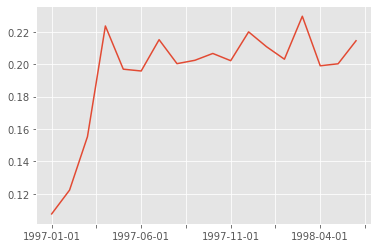

In [100]:
(pi_counts_t.sum() / pi_counts_t.count()).plot()

可以看出早期的复购率较低，后期则拥有较稳定的复购率20%左右

### 3.2 回购率

In [102]:
pi_amount = df.pivot_table(index = 'id',columns = 'month',
                          values = 'amount',aggfunc = 'mean').fillna(0)
pi_amount

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
id,,,,,,,,,,,,,,,,,,
1,11.77,0.0,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
2,44.50,0.0,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
3,20.76,0.0,20.76,19.540,0.00,0.00,0.00,0.00,0.00,0.0,39.205,0.000,0.00,0.0,0.0,0.0,16.99,0.0
4,29.53,0.0,0.00,0.000,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480,0.00,0.0,0.0,0.0,0.00,0.0
5,21.65,38.9,0.00,45.550,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465,37.47,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0.00,0.0,36.00,0.000,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
23567,0.00,0.0,20.97,0.000,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
23568,0.00,0.0,22.97,49.365,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0


In [103]:
pi_amount.columns = df.month.sort_values().astype('str').unique()
pi_amount_t = pi_amount.applymap(lambda x:1 if x>0 else 0)
pi_amount_t

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
pi_amount.columns

Index(['1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01', '1997-05-01',
       '1997-06-01', '1997-07-01', '1997-08-01', '1997-09-01', '1997-10-01',
       '1997-11-01', '1997-12-01', '1998-01-01', '1998-02-01', '1998-03-01',
       '1998-04-01', '1998-05-01', '1998-06-01'],
      dtype='object')

In [104]:
def pur_r(data):
    s = []
    for i in range(17): # 这里只循环了17行
        if data[i] == 1:
            if data[i+1] == 1:
                s.append(1)
            if data[i+1] == 0:
                s.append(0)
        else:
            s.append(np.NaN)
    s.append(np.NaN)# 没有最后一个月的下一个月数据，无法判断是否回购，故统一增为NaN
    return pd.Series(s,index = pi_amount.columns)

pi_amount_r = pi_amount_t.apply(pur_r,axis = 1) # 将函数运用到行

# 新建一个判断函数。data是输入的数据，即用户在18个月内是否消费的记录，status是空列表，后续用来保存用户是否回购的字段。

# 因为有18个月，所以每个月都要进行一次判断，需要用到循环。if的主要逻辑是，如果用户本月进行过消费，且下月消费过，记为1，下月没有消费过是0。
# 本月若没有进行过消费，为NaN，后续的统计中进行排除。

pi_amount_r

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23567,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23568,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


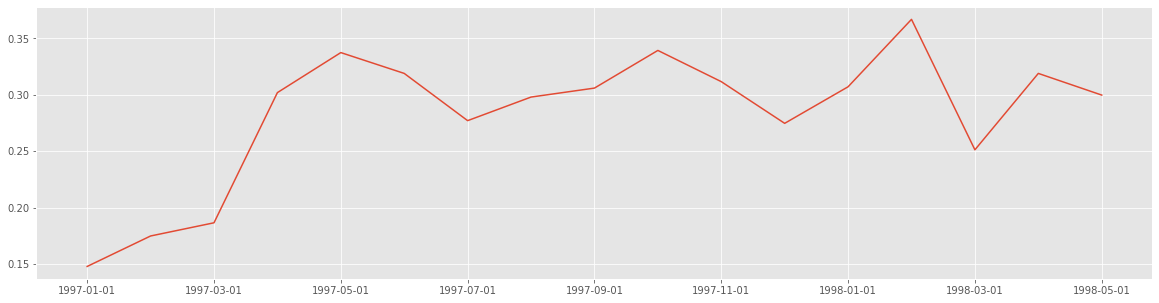

In [107]:
plt.figure(figsize=(20,5))
(pi_amount_r.sum() / pi_amount_r.count()).plot()

1. 从图中可以看出，用户的回购率高于复购，约在30%左右，波动性也较强
2. 新用户的回购率在15%左右，和老客差异不大。
3. 将回购率和复购率综合分析，可以得出，新客的整体质量低于老客，老客的忠诚度（回购率）表现较好，消费频次稍次，这是CDNow网站的用户消费特征。